In [1]:
import pandas as pd

# 파일 읽어오기
df = pd.read_csv('train_sentiment.csv')
df.head()

,user_id,user_profile_age_range,user_profile_name,user_profile_residence,user_profile_accepted_food,user_profile_accepted_movies,user_profile_accepted_music,user_profile_rejected_music,user_profile_gender,user_profile_accepted_celebrities,...,topic,wday,sentence_index,sentence,goal_topic,goal_type,knowledge,recdial,sentiment_star,sentiment_score
0,0,Under 18 years old,Fangyang Liu,Qingdao,Jiaozi Stuffed with Mackerel,"['Left Right Love Destiny', 'Hot Summer Days',...",['Once'],['Its Time'],Female,"['Cecilia Cheung', 'Kris Wu', 'Nicholas Tse']",...,NaN,NaN,0,Who is the leading actor of the movie Left Rig...,Left Right Love Destiny,Q&A,"Cecilia Cheung, Stars, Left Right Love Destiny",0,1,0.309721
1,0,Under 18 years old,Fangyang Liu,Qingdao,Jiaozi Stuffed with Mackerel,"['Left Right Love Destiny', 'Hot Summer Days',...",['Once'],['Its Time'],Female,"['Cecilia Cheung', 'Kris Wu', 'Nicholas Tse']",...,NaN,NaN,1,It's Cecilia Cheung,Left Right Love Destiny,Q&A,"Cecilia Cheung, Stars, Left Right Love Destiny",0,3,0.316815
2,0,Under 18 years old,Fangyang Liu,Qingdao,Jiaozi Stuffed with Mackerel,"['Left Right Love Destiny', 'Hot Summer Days',...",['Once'],['Its Time'],Female,"['Cecilia Cheung', 'Kris Wu', 'Nicholas Tse']",...,NaN,NaN,2,You even know that. Excellent!,Left Right Love Destiny,Q&A,NaN,0,5,0.936480
3,0,Under 18 years old,Fangyang Liu,Qingdao,Jiaozi Stuffed with Mackerel,"['Left Right Love Destiny', 'Hot Summer Days',...",['Once'],['Its Time'],Female,"['Cecilia Cheung', 'Kris Wu', 'Nicholas Tse']",...,NaN,NaN,3,Thank you for your praise. She's a Chinese ido...,Cecilia Cheung,Chat about stars,"Cecilia Cheung, Intro, Chinese dreamgirl",0,5,0.682868
4,0,Under 18 years old,Fangyang Liu,Qingdao,Jiaozi Stuffed with Mackerel,"['Left Right Love Destiny', 'Hot Summer Days',...",['Once'],['Its Time'],Female,"['Cecilia Cheung', 'Kris Wu', 'Nicholas Tse']",...,NaN,NaN,4,Yes my idol is quite unusual.,Cecilia Cheung,Chat about stars,NaN,0,5,0.609620


In [2]:
# user profile columns 확인
col = [c for c in df.columns if 'user' in c]
col

['user_id',
 'user_profile_age_range',
 'user_profile_name',
 'user_profile_residence',
 'user_profile_accepted_food',
 'user_profile_accepted_movies',
 'user_profile_accepted_music',
 'user_profile_rejected_music',
 'user_profile_gender',
 'user_profile_accepted_celebrities',
 'user_profile_accepted_movie',
 'user_profile_reject',
 'user_profile_rejected_movies',
 'user_profile_occupation',
 'user_profile_accepted_music.1',
 'user_profile_accepted_poi',
 'user_profile_favorite_news',
 'user_profile_accepted_news',
 'user_profile_poi']

In [3]:
df_user = df[col]
df_user['user_id'].unique()

array([   0,    1,    2, ..., 5675, 5676, 5677])

In [4]:
# user profile unique하게 불러오기
import tqdm
prev_user_id = -1
df_user_uniq = pd.DataFrame()
for idx, row in tqdm.tqdm(df_user.iterrows()):
    # print(row['user_id'])
    if prev_user_id != row['user_id']:
        prev_user_id = row['user_id']
        unique_row = pd.Series(row, index=row.index)
        df_user_uniq = df_user_uniq.append(unique_row, ignore_index=True)
    # print(row)

0it [00:00, ?it/s]

87286it [00:35, 2460.11it/s]


In [24]:
# user profile column별 항목 개수
for col in df_user_uniq.columns:
    print(len(df_user_uniq[col].unique()), col)

5678 user_id
7 user_profile_age_range
736 user_profile_name
53 user_profile_residence
58 user_profile_accepted_food
1177 user_profile_accepted_movies
989 user_profile_accepted_music
477 user_profile_rejected_music
2 user_profile_gender
115 user_profile_accepted_celebrities
195 user_profile_accepted_movie
5 user_profile_reject
430 user_profile_rejected_movies
3 user_profile_occupation
130 user_profile_accepted_music.1
93 user_profile_accepted_poi
105 user_profile_favorite_news
83 user_profile_accepted_news
89 user_profile_poi


In [7]:
df_user_uniq['user_profile_accepted_movie']

0       The Legend of Speed
1                       NaN
2               Flash Point
3            Battle of Wits
4                       NaN
               ...         
5673         Nanas Rose war
5674           No Mans Land
5675                  Reset
5676            Three Times
5677       Running On Karma
Name: user_profile_accepted_movie, Length: 5678, dtype: object

In [9]:
import copy

rej_movies = []
for t in df_user_uniq['user_profile_rejected_movies']:
    try:
        tmp = []
        for tt in eval(t):
            tmp.append(tt)
        rej_movies.append(copy.deepcopy(tmp))
    except:
        rej_movies.append(['nan'])

acp_movies = []
for t in df_user_uniq['user_profile_accepted_movies']:
    try:
        tmp = []
        for tt in eval(t):
            tmp.append(tt)
        acp_movies.append(copy.deepcopy(tmp))
    except:
        acp_movies.append(['nan'])
acp_movies

[['Left Right Love Destiny',
  'Hot Summer Days',
  'Fly Me to Polaris',
  'Help!!!',
  'One Night in Mongkok',
  'The Bullet Vanishes'],
 ['nan'],
 ['Tiles of Deception', 'Lurid Affections: The Making of Lust', 'Caution'],
 ['Flash Point',
  'Sophies Revenge',
  'I Am Not Madame Bovary',
  'Call for Love',
  'Hand Phone'],
 ['nan'],
 ['The Hidden Battle'],
 ['From ashes to ashes',
  'Double Tap',
  'Moonlight Express',
  'Tiles of Deception',
  'Lurid Affections: The Making of Lust',
  'Caution'],
 ['Dragons Love', 'The Wonderful Wedding'],
 ['nan'],
 ['To Me the Way'],
 ['Tiles of Deception', 'Lurid Affections: The Making of Lust', 'Caution'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Anna Magdalena', 'Murderer', 'Floating City', 'Silent Witness'],
 ['nan'],
 ['To Me the Way'],
 ['nan'],
 ['Mr. Six'],
 ['Princess and Seven Kung Fu Masters',
  'Happy Running',
  'Happy Camp: Bring Happiness Home',
  'Nanas Rose war',
  'Tiles of Deception',
  'Lurid Affections: The Making of Lust',
 

In [10]:
# Movie Item2Vector
from gensim.models import Word2Vec

model = Word2Vec(rej_movies+acp_movies, vector_size=16)

# 단어 벡터 확인
word_vectors = model.wv
print(word_vectors['My Dear Son'])


[ 0.08606932 -0.13138224 -0.18054473 -0.1942612   0.72832066  0.41778597
  0.81677395  0.25168368 -0.02623195  0.16096881  0.03724263 -0.20963714
  0.15463364 -0.37789756 -0.18522374  0.47072577]


In [11]:
import numpy as np

import copy
# movie 정보 저장
# user 0: ['Movie 0', 'Movie 1'], user 1: ['Movie 1'] ...
# -> [['Movie 0', 'Movie 1'], ['Movie 1']]
# accept, reject 모든 정보 사용

rej_movies = []
for t in df_user_uniq['user_profile_rejected_movies']:
    try:
        tmp = []
        for tt in eval(t):
            tmp.append(tt)
        rej_movies.append(copy.deepcopy(tmp))
    except:
        rej_movies.append(['nan'])

acp_movies = []
for t in df_user_uniq['user_profile_accepted_movies']:
    try:
        tmp = []
        for tt in eval(t):
            tmp.append(tt)
        acp_movies.append(copy.deepcopy(tmp))
    except:
        acp_movies.append(['nan'])
acp_movies

# Item2Vec
from gensim.models import Word2Vec

model = Word2Vec(rej_movies+acp_movies, vector_size=16)

# 단어 벡터 확인
word_vectors = model.wv
print(word_vectors['My Dear Son'])

# user가 해당 Movie를 선호(accepted)하면 +, 선호하지 않으면(rejected) -
# ex) user 0이 Movie 1, Movie 3을 좋아하고 Movie 2를 싫어했다.
# (Movie 1 vector [16차원 벡터] + Movie 2 vector [16차원 벡터]) / 2 - (Movie 2 vector [16차원 벡터]) / 1
# 각 유저별 벡터의 평균을 낸다.

acp_movies_data = np.zeros((len(df_user_uniq),16))
for idx, row in df_user_uniq.iterrows():
    try:
        for tt in eval(row['user_profile_accepted_movies']):
            acp_movies_data[idx] += word_vectors[tt]
        acp_movies_data[idx] /= len(eval(row['user_profile_accepted_movies']))
    except:
        acp_movies_data[idx] += word_vectors['nan']
rej_movies_data = np.zeros((len(df_user_uniq),16))
for idx, row in df_user_uniq.iterrows():
    try:
        for tt in eval(row['user_profile_rejected_movies']):
            rej_movies_data[idx] -= word_vectors[tt]
        acp_movies_data[idx] /= len(eval(row['user_profile_rejected_movies']))
    except:
        rej_movies_data[idx] -= word_vectors['nan']
movies_data = acp_movies_data + rej_movies_data

[ 0.07807464 -0.11178361 -0.1686519  -0.22453988  0.6939723   0.4009184
  0.7906009   0.29000807 -0.03053217  0.15765789  0.05035992 -0.22598223
  0.15209706 -0.4395773  -0.15013978  0.45162368]


In [12]:
import numpy as np

import copy
# Movie와 동일
rej_music = []
for t in df_user_uniq['user_profile_rejected_music']:
    try:
        tmp = []
        for tt in eval(t):
            tmp.append(tt)
        rej_music.append(copy.deepcopy(tmp))
    except:
        rej_music.append(['nan'])

acp_music = []
for t in df_user_uniq['user_profile_accepted_music']:
    try:
        tmp = []
        for tt in eval(t):
            tmp.append(tt)
        acp_music.append(copy.deepcopy(tmp))
    except:
        acp_music.append(['nan'])
acp_music

from gensim.models import Word2Vec

model = Word2Vec(rej_music+acp_music, vector_size=16)

# 단어 벡터 확인
word_vectors_music = model.wv


acp_music_data = np.zeros((len(df_user_uniq),16))
for idx, row in df_user_uniq.iterrows():
    try:
        for tt in eval(row['user_profile_accepted_music']):
            acp_music_data[idx] += word_vectors_music[tt]
        acp_music_data[idx] /= len(eval(row['user_profile_accepted_music']))
    except:
        acp_music_data[idx] += word_vectors_music['nan']
rej_music_data = np.zeros((len(df_user_uniq),16))
for idx, row in df_user_uniq.iterrows():
    try:
        for tt in eval(row['user_profile_rejected_music']):
            rej_music_data[idx] -= word_vectors_music[tt]
        rej_music_data[idx] /= len(eval(row['user_profile_rejected_music']))
    except:
        rej_music_data[idx] -= word_vectors_music['nan']
music_data = acp_music_data + rej_music_data

In [13]:
music_data.shape, movies_data.shape

((5678, 16), (5678, 16))

In [14]:
# 유저 취향 벡터를 [[Movie 선호 벡터(16차원)][Music 선호 벡터(16차원)]] => 32차원
movie_music_data = np.concatenate([music_data, movies_data],axis=1)

In [16]:

age2idx = {'Under 18 years old': 2,
 'Over 50 years old': 6,
 '26-35': 4,
 '7-10': 1,
 '18-25': 3,
 '36-50': 5,
 'Under 7 years old': 0}
color = df_user_uniq['user_profile_age_range'].map(age2idx)

/opt/conda/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

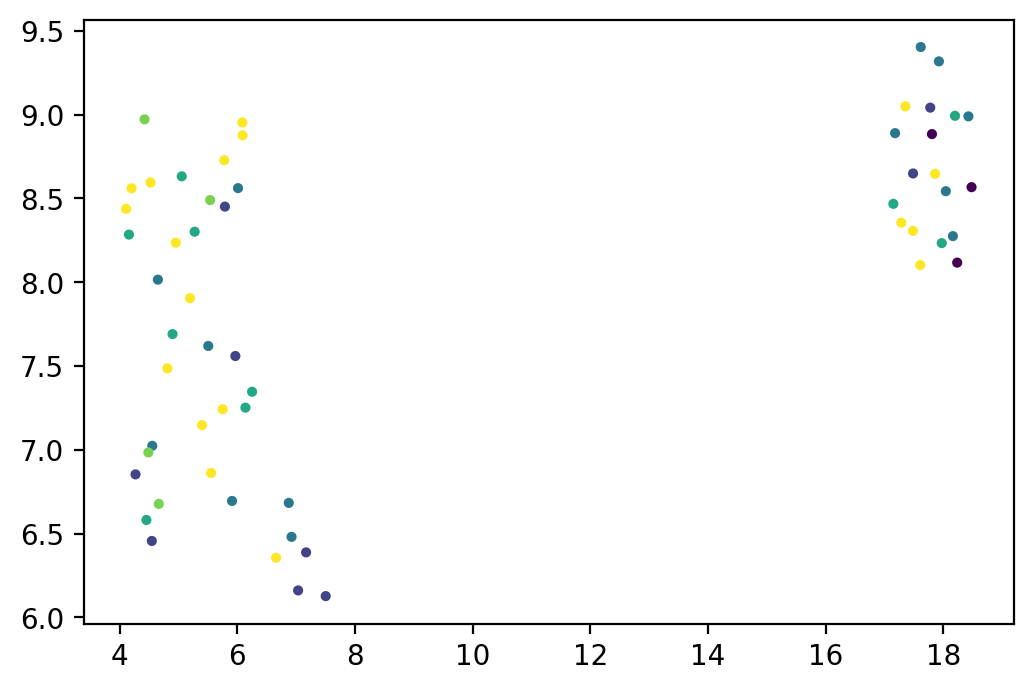

In [17]:
import matplotlib.pyplot as plt
import umap

# UMAP으로 2차원에 적용
num = 80000
skip = 100
umap_emb = umap.UMAP(n_components=2, random_state=42)
embedded_data = umap_emb.fit_transform(acp_music_data[:num:skip])

# 시각화
plt.figure(dpi=200)
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=color[:num:skip],s=7)
plt.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=embedded_data[:, 0],y=embedded_data[:, 1], mode='markers'))
fig.show()

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


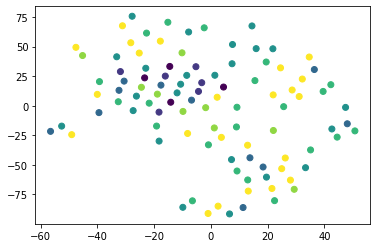

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 예시 데이터
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [10, 11, 12]]

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(movie_music_data[:100])
# 시각화
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=color[:100])
plt.show()
